In [22]:
#start with all of the imports
import pandas as pd
import glob
import json
import numpy as np
import pandas as pd
import csv
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#get the data from the spreadsheet and set the index on the Team column
df=pd.read_csv("reshaped_grouped.csv",index_col=0)
df.head()

,Most_Negative,Moderate_Negative,Neutral,Moderate_Positive,Most_Positive
teams,,,,,
angels,5,12,39,38,47
athletics,4,29,124,274,287
bluejays,6,32,46,230,346
braves,18,28,44,62,148
brewers,8,12,30,81,73


Text(0, 0.5, 'Tweet Count')

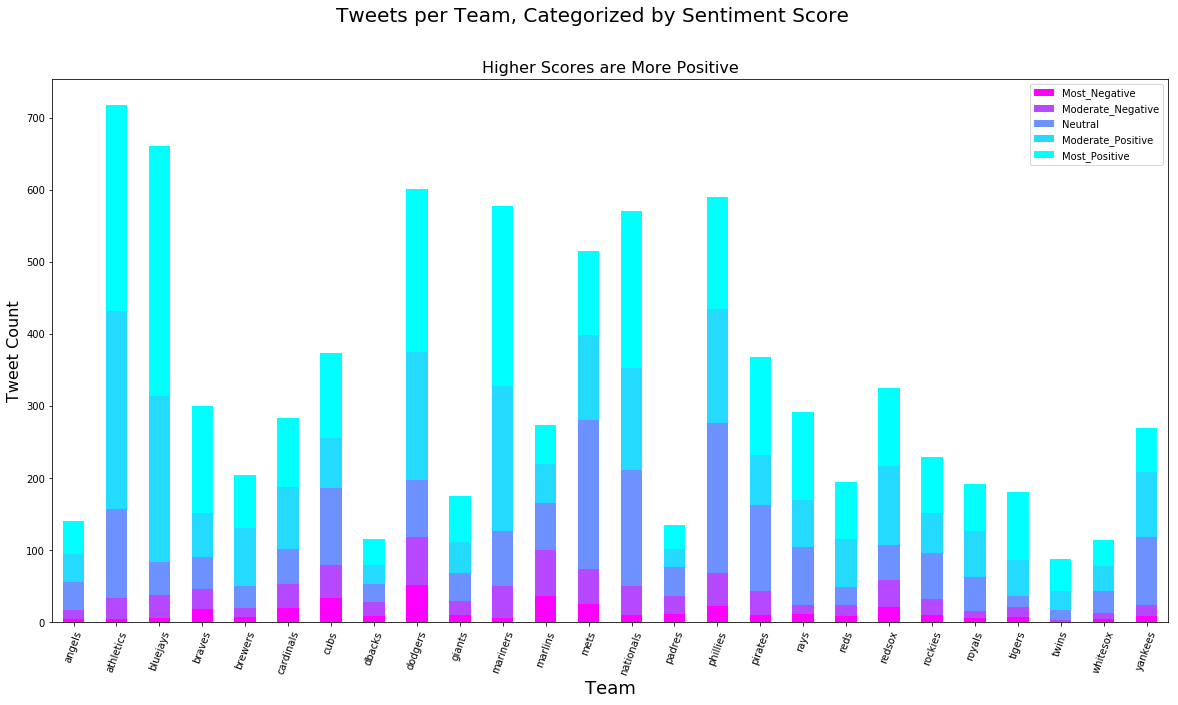

In [24]:

colors = plt.cm.cool_r(np.linspace(0, 2, 8))
df.plot(kind='bar', stacked=True, figsize=(20, 10), color=colors)
plt.xticks(rotation=70)
plt.suptitle('Tweets per Team, Categorized by Sentiment Score', fontsize=20)
plt.title('Higher Scores are More Positive', fontsize=16)

plt.xlabel('Team', fontsize=18)
plt.ylabel('Tweet Count', fontsize=16)

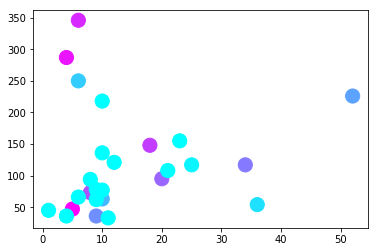

In [26]:
colors = plt.cm.cool_r(np.linspace(0, 2, 26))


plt.scatter(df.Most_Negative, df.Most_Positive, s=200, c=colors)

In [41]:
#next we need to make a new DF so we can add an index and move the existing index to a column
df2=df.reset_index()
df2.head()

,teams,Most_Negative,Moderate_Negative,Neutral,Moderate_Positive,Most_Positive
0,angels,5,12,39,38,47
1,athletics,4,29,124,274,287
2,bluejays,6,32,46,230,346
3,braves,18,28,44,62,148
4,brewers,8,12,30,81,73


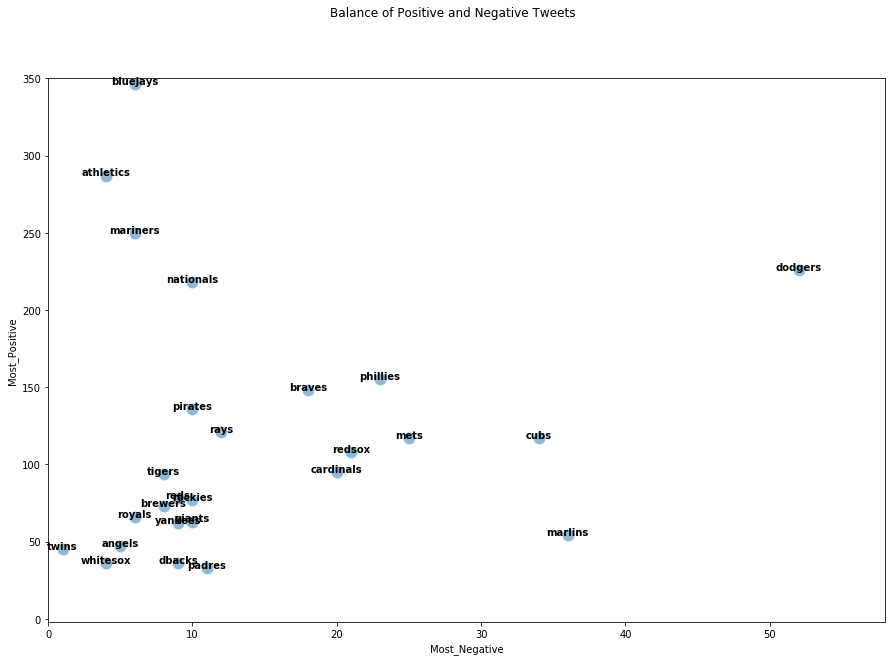

In [53]:
import seaborn as sns

#Create figure
plt.figure(figsize = (15,10))
plt.suptitle("Balance of Positive and Negative Tweets", fontsize=12)
# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df2.Most_Negative, df2.Most_Positive, alpha = 0.5,s=150)

ax.set_xlim(0,58)
ax.set_ylim(-2, 350)

#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(df2.Most_Negative[line], df2.Most_Positive[line], df2.teams[line], horizontalalignment='center', size='medium', color='black', weight='semibold')